# Spectrogram plotting
Todo: 
- Use test set right?
- Mapping to same original tensor to make sure it's the same
- Fitting color scheme
- Test other models

In [8]:
import numpy as np

# Load multiple spectrograms from a list of paths
def load_spectrograms(paths):
    return [np.load(p) for p in paths]

# Example usage:
paths = [
    "/workspace/projects/biofoundation/results/log_spectrograms/spectrograms_batchAudioMAEModel-beans_watkins-0.npy",
    "/workspace/projects/biofoundation/results/log_spectrograms/spectrograms_batchAudioMAEModel-HSN-0.npy"
    # add more paths as needed
]
spec_batches = load_spectrograms(paths)

# Print info for each loaded batch
for idx, batch in enumerate(spec_batches):
    print(f"Batch {idx} shape:", batch.shape)
    print(f"Batch {idx} min/max:", batch.min(), batch.max())

Batch 0 shape: (128, 1, 1024, 128)
Batch 0 min/max: -1.0448432 1.3519125
Batch 1 shape: (128, 1, 1024, 128)
Batch 1 min/max: -1.0448432 1.5837351


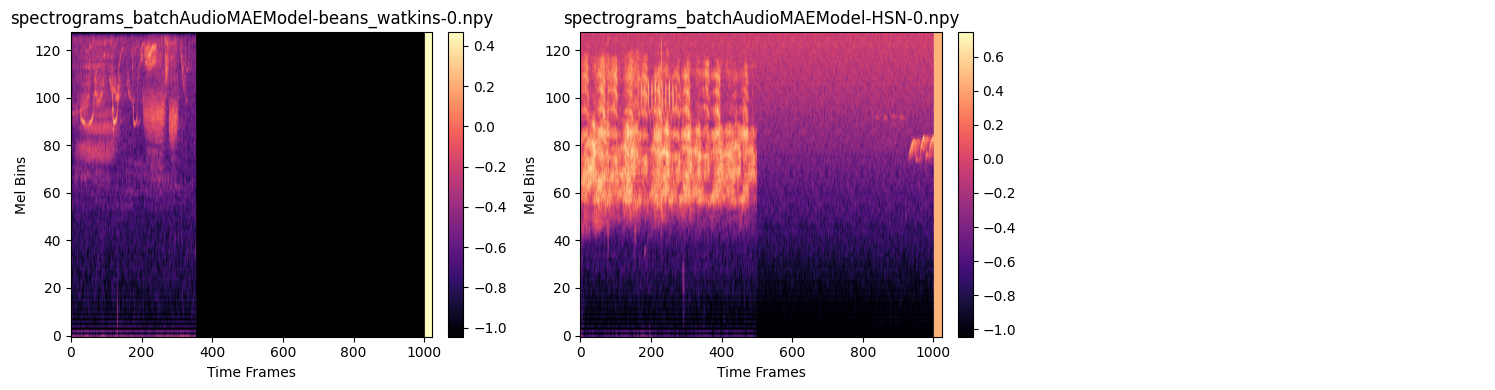

In [9]:
import os

import matplotlib.pyplot as plt

# Plot all spectrograms in a grid, with file name as title
n = len(paths)
ncols = 3
nrows = (n + ncols - 1) // ncols

fig, axes = plt.subplots(nrows, ncols, figsize=(ncols * 5, nrows * 4))
axes = axes.flatten()

for idx, (batch, path) in enumerate(zip(spec_batches, paths)):
    # Remove batch and channel dims if present
    spec = batch[0, 0] if batch.ndim == 4 else batch[0] if batch.ndim == 3 else batch
    # Transpose if time is first axis
    if spec.shape[0] > spec.shape[1]:
        spec = spec.T
    ax = axes[idx]
    im = ax.imshow(spec, aspect="auto", origin="lower", cmap="magma")
    ax.set_title(os.path.basename(path))
    ax.set_xlabel("Time Frames")
    ax.set_ylabel("Mel Bins")
    fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)

# Hide unused axes
for ax in axes[n:]:
    ax.axis("off")

plt.tight_layout()
plt.show()